[Home](../../README.md)

### Data Preprocessing

This Jupyter Notebook demonstrates different processes you can apply to your data to better understand it before data wrangling. For this demonstration we will use relatively a complex real dataset that compares health measures with the speed of progress of type 2 adult onset diabetes.

#### Load the required dependencies

Load the two required dependencies:

- [Pandas](https://pandas.pydata.org/) is library for data analysis and manipulation.
- [Matplotlib](https://matplotlib.org) a comprehensive library for creating static, animated, and interactive visualizations in Python. A customised stylesheet for the visualisations is also applied.

In [1]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('style_Matplotlib_charts.mplstyle')

####  Store the data as a local variable

The data frame is a Pandas object that structures your tabular data into an appropriate format. It loads the complete data in memory so it is now ready for preprocessing.

In [2]:
data_frame = pd.read_csv("poker_hand_dataset.csv")

#### Data Snapshot

While it is useful to get a high-level look at the dataset, this preview is not very informative due to the lack of feature engineering. The dataset primarily consists of raw data showing the ranks and suits of cards, which are not yet transformed into meaningful categories.Without proper encoding or feature extraction, it is difficult to derive insights or perform effective analysis.

In [3]:
# Target = A measure of disease progression in one year
data_frame.head()

,Suit of Card 1,Suit of Card 2,Suit of Card 3,Suit of Card 4,Suit of Card 5,Rank of Card 1,Rank of Card 2,Rank of Card 3,Rank of Card 4,Rank of Card 5,Poker Hand
0,4,3,4,4,2,12,11,2,3,10,0
1,4,2,3,1,2,5,5,8,6,2,1
2,2,4,2,3,3,2,3,3,11,5,1
3,3,4,4,4,2,6,9,2,12,12,1
4,1,4,1,4,2,3,9,9,3,3,6


####  Data Summary
 
The `info()` method call prints a summary of each column, giving you more information about the specific data types, total number of rows, null values and memory usage.

In [4]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Suit of Card 1  50000 non-null  int64
 1   Suit of Card 2  50000 non-null  int64
 2   Suit of Card 3  50000 non-null  int64
 3   Suit of Card 4  50000 non-null  int64
 4   Suit of Card 5  50000 non-null  int64
 5   Rank of Card 1  50000 non-null  int64
 6   Rank of Card 2  50000 non-null  int64
 7   Rank of Card 3  50000 non-null  int64
 8   Rank of Card 4  50000 non-null  int64
 9   Rank of Card 5  50000 non-null  int64
 10  Poker Hand      50000 non-null  int64
dtypes: int64(11)
memory usage: 4.2 MB


#### Statistics For Numerical Columns
 
The `describe()` method call provides basic statistical knowledge like the mean and spread of the data.

In [5]:
data_frame.describe()

,Suit of Card 1,Suit of Card 2,Suit of Card 3,Suit of Card 4,Suit of Card 5,Rank of Card 1,Rank of Card 2,Rank of Card 3,Rank of Card 4,Rank of Card 5,Poker Hand
count,50000.000000,50000.000000,50000.0000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2.505160,2.504900,2.5028,2.495960,2.498240,7.997780,8.003680,8.039180,8.000040,7.975860,1.621740
std,1.119517,1.117229,1.1204,1.117268,1.117596,3.736043,3.732145,3.738749,3.738122,3.751778,1.487798
min,1.000000,1.000000,1.0000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
25%,2.000000,2.000000,1.0000,1.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000
50%,3.000000,3.000000,3.0000,2.000000,2.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1.000000
75%,4.000000,4.000000,4.0000,3.000000,4.000000,11.000000,11.000000,11.000000,11.000000,11.000000,3.000000
max,4.000000,4.000000,4.0000,4.000000,4.000000,14.000000,14.000000,14.000000,14.000000,14.000000,9.000000


#### Graphically Present the Data

At this early stage, the goal is to evaluate the dataset. The simple plots below allow you to visualize the data in different ways, helping to inform your model design and guide your data wrangling approaches.

<Axes: >

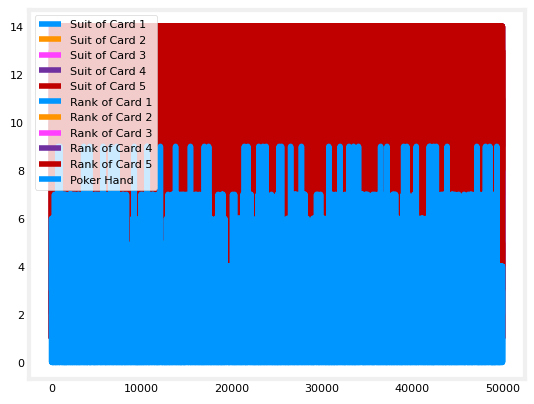

In [6]:
# plot a line graph 
data_frame.plot()

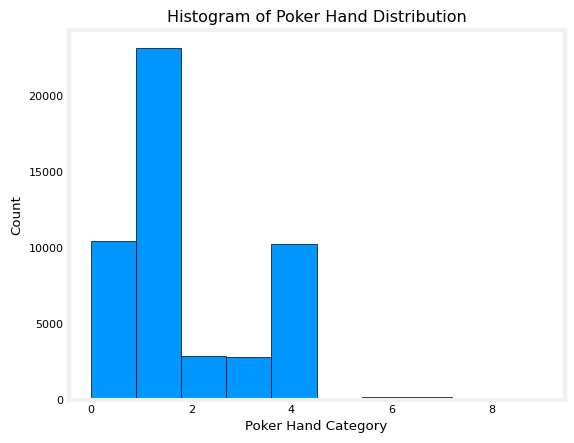

In [ ]:

# Plot a histogram of Poker Hand classifications
plt.hist(data_frame['Poker Hand'], bins=10, edgecolor='black')

# Titles and labels
plt.title("Histogram of Poker Hand Distribution")
plt.ylabel("Count")
plt.xlabel("Poker Hand Category")

# Show the plot
plt.show()


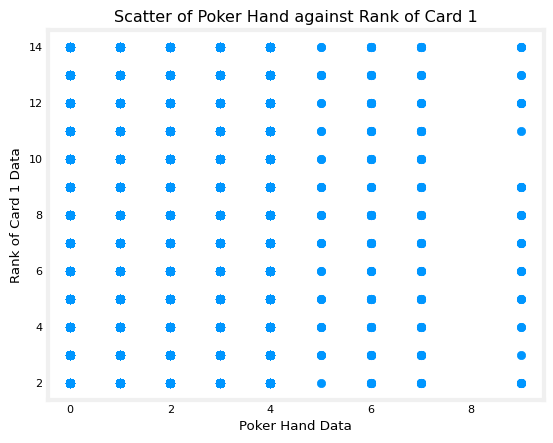

In [10]:

# Scatter plot of Poker Hand vs. Rank of Card 1
plt.scatter(data_frame['Poker Hand'], data_frame['Rank of Card 1'])

# Updated titles
plt.title(f"Scatter of {data_frame['Poker Hand'].name} against {data_frame['Rank of Card 1'].name}")
plt.ylabel(f'{data_frame["Rank of Card 1"].name} Data')
plt.xlabel(f'{data_frame["Poker Hand"].name} Data')

# Show plot
plt.show()


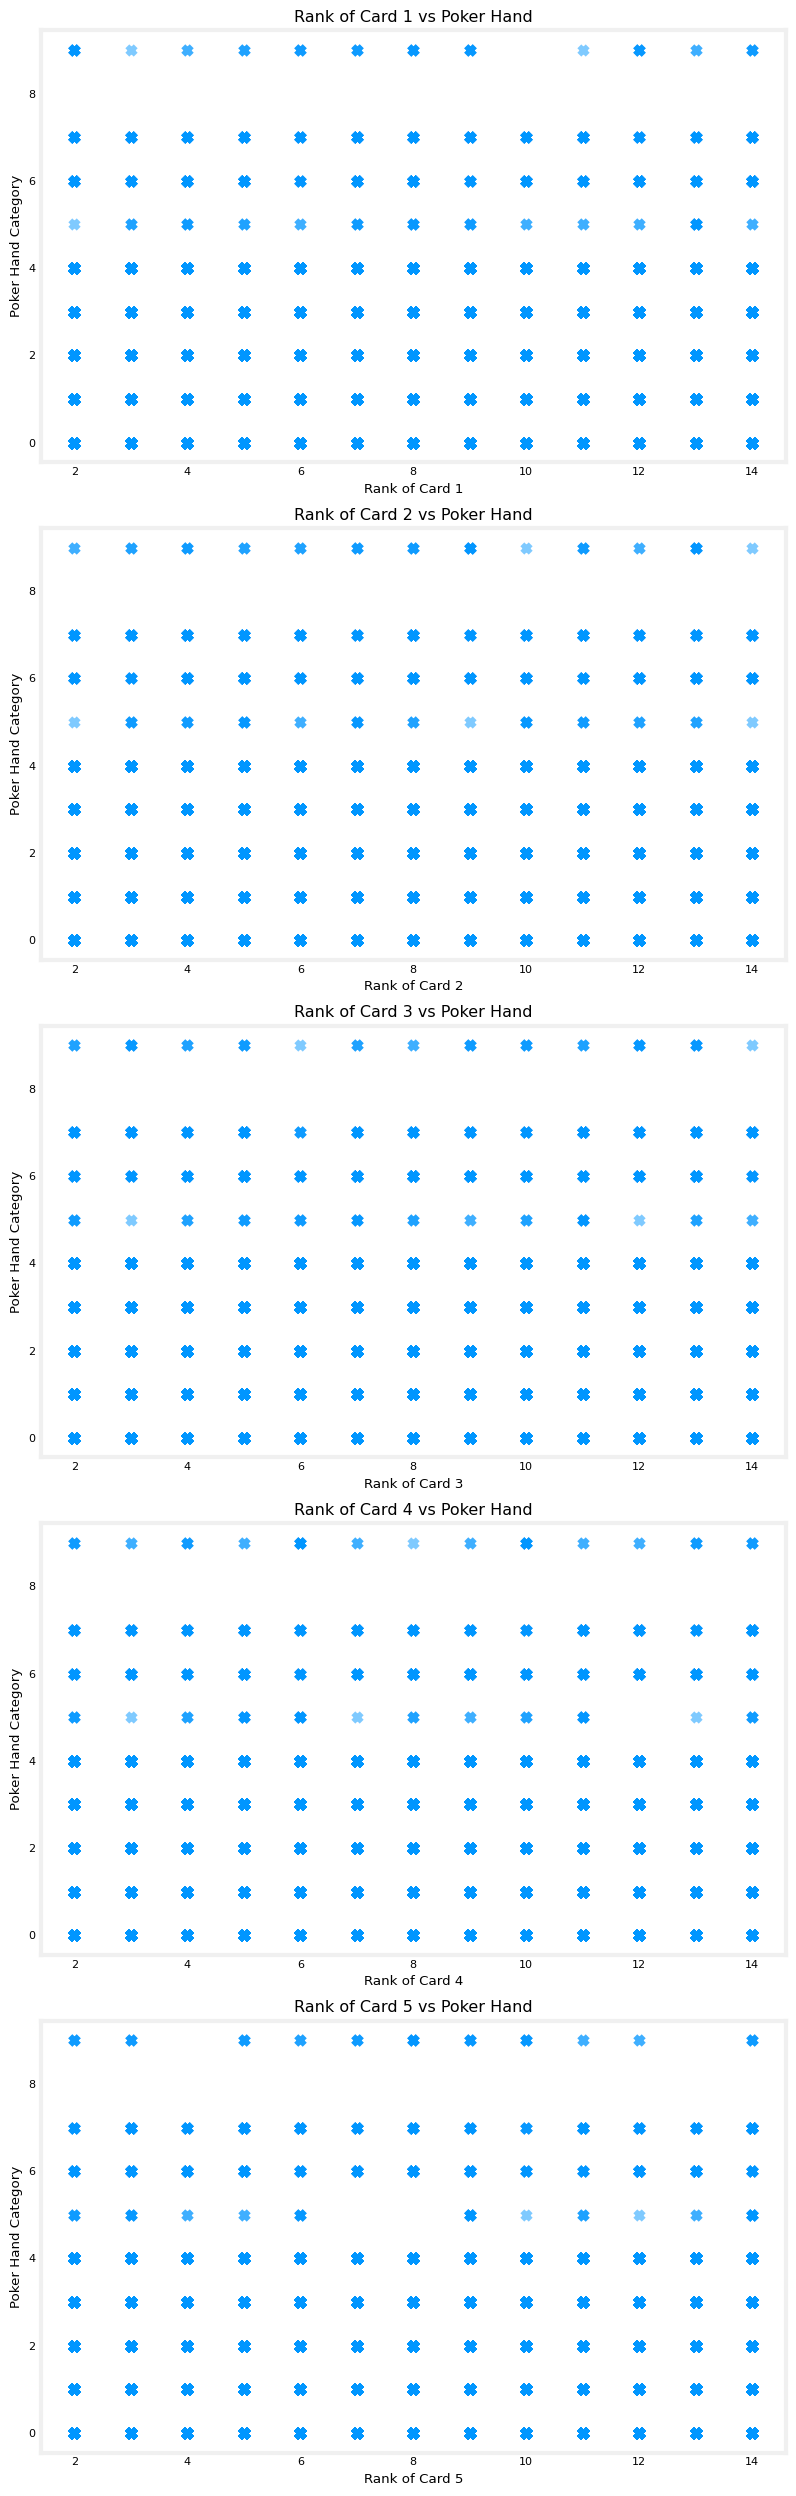

In [11]:

# Define columns to plot (using Rank of Cards)
x_plot = ['Rank of Card 1', 'Rank of Card 2', 'Rank of Card 3', 'Rank of Card 4', 'Rank of Card 5']

# Create subplots
fig, axes = plt.subplots(nrows=len(x_plot), figsize=(8, 5 * len(x_plot)))

for i, col in enumerate(x_plot):
    axes[i].scatter(data_frame[col], data_frame['Poker Hand'], marker='x', alpha=0.5)
    axes[i].set_title(f"{col} vs Poker Hand")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Poker Hand Category")

plt.tight_layout()
plt.show()


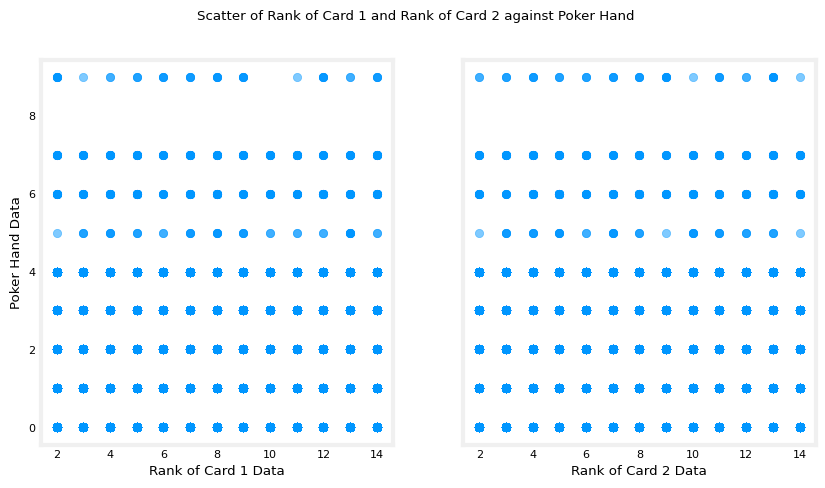

In [13]:

# Scatter plot 2 columns in separate charts with a shared y-axis
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 5))

# Update title
plt.suptitle(f"Scatter of {data_frame['Rank of Card 1'].name} and {data_frame['Rank of Card 2'].name} against {data_frame['Poker Hand'].name}")

# Shared Y-axis label
ax1.set_ylabel(f'{data_frame["Poker Hand"].name} Data')

# First scatter plot
ax1.scatter(data_frame['Rank of Card 1'], data_frame['Poker Hand'], alpha=0.5)
ax1.set_xlabel(f'{data_frame["Rank of Card 1"].name} Data')

# Second scatter plot
ax2.scatter(data_frame['Rank of Card 2'], data_frame['Poker Hand'], alpha=0.5)
ax2.set_xlabel(f'{data_frame["Rank of Card 2"].name} Data')

plt.show()


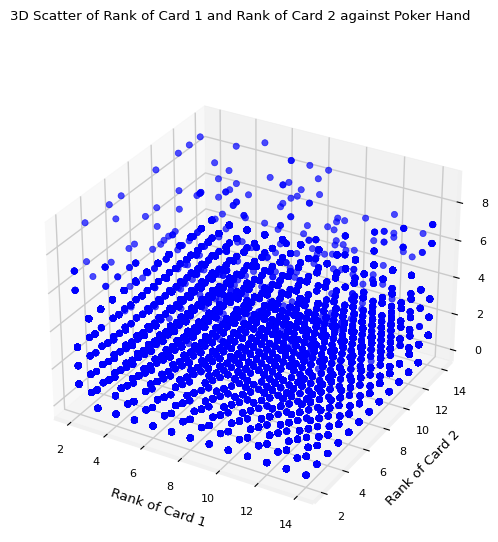

In [15]:


# Define columns for 3D plot
x_plot = ['Rank of Card 1', 'Rank of Card 2']  # Replacing missing columns
target_column = 'Poker Hand'  # Using Poker Hand as target

# Create 3D figure
fig = plt.figure(figsize=(8, 6))
plt.suptitle(f"3D Scatter of {x_plot[0]} and {x_plot[1]} against {target_column}")
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(data_frame[x_plot[0]], data_frame[x_plot[1]], data_frame[target_column], color='blue', alpha=0.7)

# Set axis labels
ax.set_xlabel(x_plot[0])
ax.set_ylabel(x_plot[1])
ax.set_zlabel(target_column)

plt.show()
